# Data from Survey of Consumer Finances

In this project, am going to work with data from the **Survey of Consumer Finances (SCF)**. The SCF is a survey sponsored by the US Federal Reserve. It tracks financial, demographic, and opinion information about families in the United States. The survey is conducted every three years, and we'll work with an extract of the results from 2019.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Prepare Data

### Import
First, i need to load the data, which is stored in a CSV file: SCFP2009.csv.

In [2]:
df = wrangle(r"C:\Users\gbest\Desktop\my_project\consumer_finance_in_usa\SCFP2009.csv")
print(df.shape)
df.head()

(19285, 515)


,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
0,1,11,11668.13420,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.27894,0.0,0.0,0.0,93.125197,270.403054,57
1,1,12,11823.45649,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.27894,0.0,0.0,0.0,93.125197,249.593620,57
2,1,13,11913.22835,47,3,12,2,1,0,2,...,-50.000000,-32.931828,0.0,15939.27894,0.0,0.0,0.0,93.125197,209.233358,57
3,1,14,11929.39427,47,3,12,2,1,0,2,...,-33.333333,-32.931828,0.0,15939.27894,0.0,0.0,0.0,93.125197,209.273158,57
4,1,15,11917.72291,47,3,12,2,1,0,2,...,-38.596491,-32.931828,0.0,15939.27894,0.0,0.0,0.0,93.125197,232.690767,57


One of the first things you might notice here is that this dataset is HUGE — over 19,000 rows and 515 columns! SO MUCH DATA!!! We won't have time to explore all of the features in this dataset, but you can look in the data dictionary for this project for details and links to the official Code Book. For now, let's just say that this dataset tracks all sorts of behaviors relating to the ways households earn, save, and spend money in the United States.

For this project, am going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the "TURNFEAR" column.

Use a mask to subset create df to only households that have been turned down or feared being turned down for credit ("TURNFEAR" == 1). Assign this subset to the variable name df_fear.

In [4]:
mask = df["FEARED07"] == 1
df_fear = df[mask]
df_fear.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
35,8,81,9412.034171,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.401970,57
36,8,82,9296.095772,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.573788,57
37,8,83,9452.091830,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.805687,57
38,8,84,9075.983611,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.307817,57
39,8,85,9385.769811,49,3,12,2,1,1,3,...,60.0,-6.457549,0.0,0.0,0.0,0.0,0.0,382.812993,-15.336238,57


### Explore

**Age**

Now that have the subset, let's explore the characteristics of this group. One of the features is age group ("AGECL07").

 Create a list age_groups with the unique values in the "AGECL07" column. Then review the entry for "AGECL07" in the Code Book to determine what the values represent.

In [5]:
df_fear["AGECL07"].unique()

array([3, 4, 1, 6, 2, 5], dtype=int64)

In [7]:
agecl_dict = {
    1: "under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "above 75"
}
age_cl = (
    df_fear["AGECL07"]
    .replace(agecl_dict)
    .value_counts(normalize=True)
)
age_cl

AGECL07
under 35    0.353648
35-44       0.303381
45-54       0.200623
55-64       0.091192
65-74       0.044484
above 75    0.006673
Name: proportion, dtype: float64

Now that i have better labels, let's make a bar chart and see the age distribution of our group.

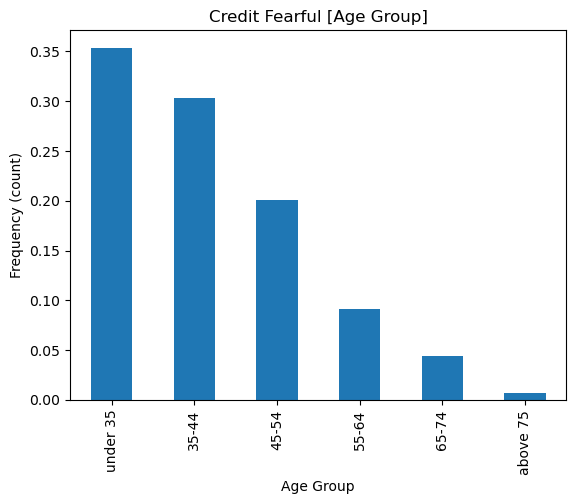

In [14]:
age_cl.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="Frequency (count)",
    title="Credit Fearful [Age Group]"
);

You might have noticed that by creating their own age groups, the authors of the survey have basically made a histogram for us comprised of 6 bins. Our chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

To do that, we'll need to look at a different variable: "AGE". Whereas "AGECL07" was a categorical variable, "AGE" is continuous, so i can use it to make a histogram of our own

Create a histogram of the "AGE" column with 10 bins.

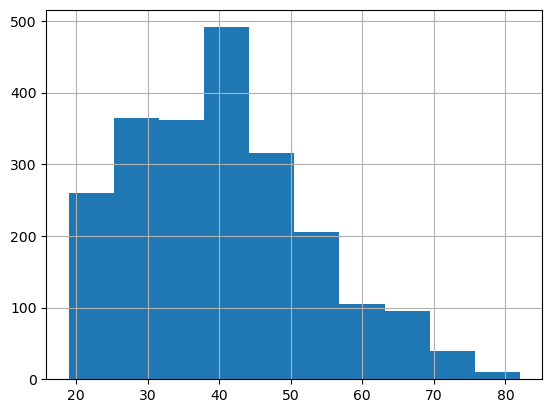

In [19]:
df_fear["AGE07"].hist(bins=10);

Createing a horizontal bar chart showing the normalized value counts for "RACE". In the chart, i will replace the numerical values with the true group names.

In [20]:
df_fear["RACE"].unique()

array([1, 2, 3, 5], dtype=int64)

In [21]:
race_dict = {
    1: "White/None-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other"
}

race_fear_cl = (
    df_fear["RACE"]
    .replace(race_dict)
    .value_counts(normalize=True)
)
race_fear_cl

RACE
White/None-Hispanic       0.557829
Black/African-American    0.274466
Hispanic                  0.133897
Other                     0.033808
Name: proportion, dtype: float64

(0.0, 1.0)

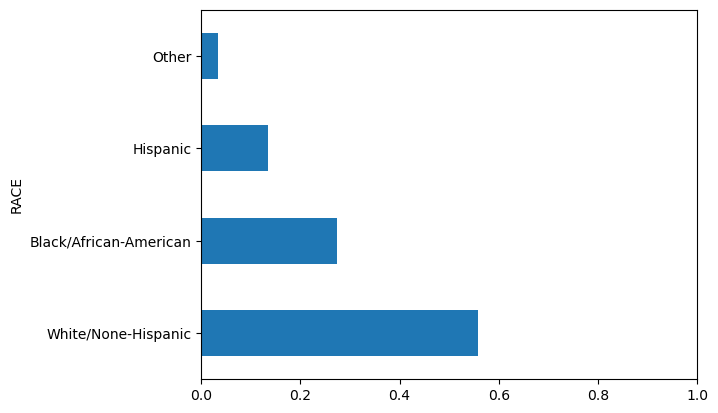

In [22]:
race_fear_cl.plot(kind="barh")
plt.xlim((0, 1))

This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

In [41]:
race_dict = {
    1: "White/None-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other"
}

race_cl = (
    df["RACE"]
    .replace(race_dict)
    .value_counts(normalize=True)
)
race_cl

RACE
White/None-Hispanic       0.798496
Black/African-American    0.094426
Hispanic                  0.066165
Other                     0.040913
Name: proportion, dtype: float64

(0.0, 1.0)

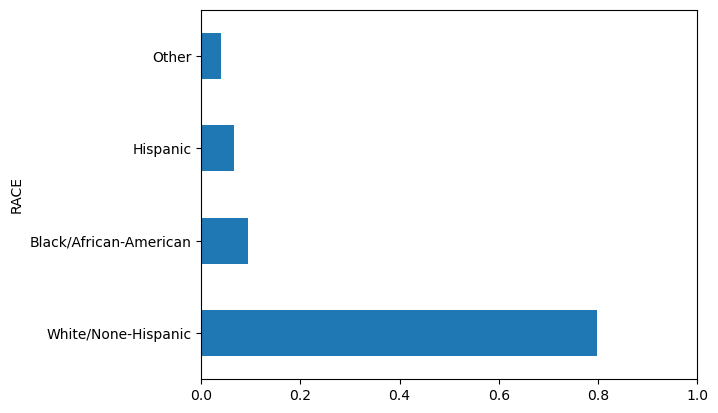

In [42]:
race_cl.plot(kind="barh")
plt.xlim((0, 1))

How does this second bar chart change our perception of the first one? On the one hand, we can see that White Non-Hispanics account for around 70% of whole dataset, but only 54% of credit fearful respondents. On the other hand, Black and Hispanic respondents represent 23% of the whole dataset but 40% of credit fearful respondents. In other words, Black and Hispanic households are actually more likely to be in the credit fearful group.

Let's make correlation matrices using the rest of the data for both df and df_fear and see if the differences persist. Here, i will look at only 5 features: **"ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC"**.

Making a correlation matrix using df, considering only the columns **"ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC"**.

In [24]:
mask = ["ASSET07", "INCOME07", "HOUSES07", "EDUC07", "DEBT07"]
corr = df[mask].corr()
corr.style.background_gradient(axis=None)

,ASSET07,INCOME07,HOUSES07,EDUC07,DEBT07
ASSET07,1.000000,0.612826,0.567786,0.158000,0.282238
INCOME07,0.612826,1.000000,0.320918,0.111176,0.157061
HOUSES07,0.567786,0.320918,1.000000,0.157824,0.163374
EDUC07,0.158000,0.111176,0.157824,1.000000,0.101436
DEBT07,0.282238,0.157061,0.163374,0.101436,1.000000


Make a correlation matrix using df_fear.

In [25]:
mask = ["ASSET07", "INCOME07", "HOUSES07", "EDUC07", "DEBT07"]
corr = df_fear[mask].corr()
corr.style.background_gradient(axis=None)

,ASSET07,INCOME07,HOUSES07,EDUC07,DEBT07
ASSET07,1.000000,0.988192,0.310626,0.015418,0.488480
INCOME07,0.988192,1.000000,0.311956,0.015802,0.470124
HOUSES07,0.310626,0.311956,1.000000,0.188830,0.849723
EDUC07,0.015418,0.015802,0.188830,1.000000,0.225671
DEBT07,0.488480,0.470124,0.849723,0.225671,1.000000


 **Education**
 
 Creating a DataFrame edu that shows the normalized frequency for education categories for both the credit fearful and non-credit fearful households in the dataset.

In [26]:
educ = (
    df["EDUC07"]
    .groupby(df["FEARED07"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
educ

,FEARED07,EDUC07,frequency
0,0,16,0.263603
1,0,17,0.234372
2,0,12,0.229148
3,0,14,0.109409
4,0,13,0.043083
5,0,15,0.027880
6,0,11,0.023185
7,0,10,0.021776
8,0,9,0.015437
9,0,8,0.012678


Using seaborn, create a side-by-side bar chart of educ. Set hue to "TURNFEAR", and make sure that the education categories are in the correct order along the x-axis. Label to the x-axis "Education Level", the y-axis "Frequency (%)", and use the title "Educational Attainment: Credit Fearful vs. Non-fearful".

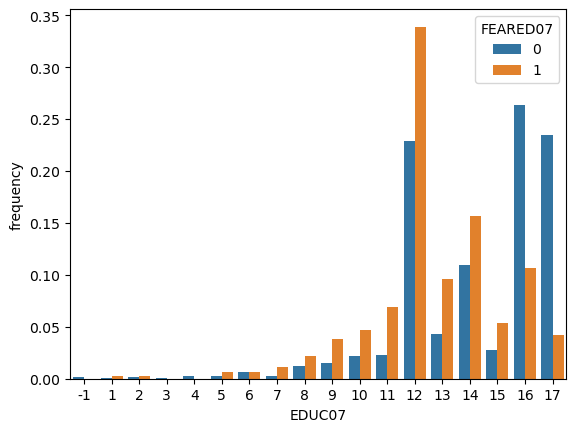

In [29]:
sns.barplot(
    x="EDUC07",
    y="frequency",
    hue="FEARED07",
    data=educ
);

 Using df to make a scatter plot showing the relationship between DEBT and ASSET.

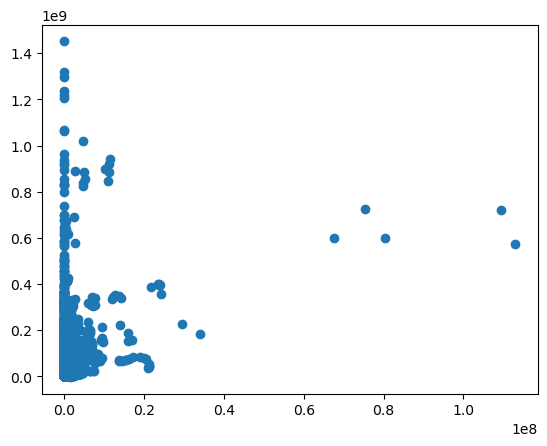

In [78]:
plt.scatter(x=df["DEBT07"], y=df["ASSET07"]);

 Using df_fear to make a scatter plot showing the relationship between DEBT and ASSET.

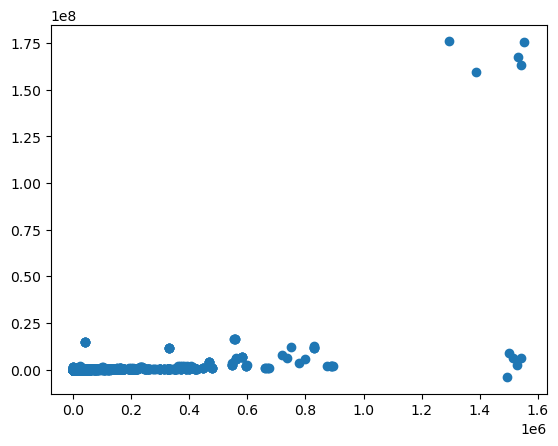

In [79]:
plt.scatter(x=df_fear["DEBT07"], y=df_fear["ASSET07"]);

>You can see relationship in our df_fear graph is flatter than the one in our df graph, but they clearly are different.

Using df to make a scatter plot showing the relationship between HOUSES and DEBT.

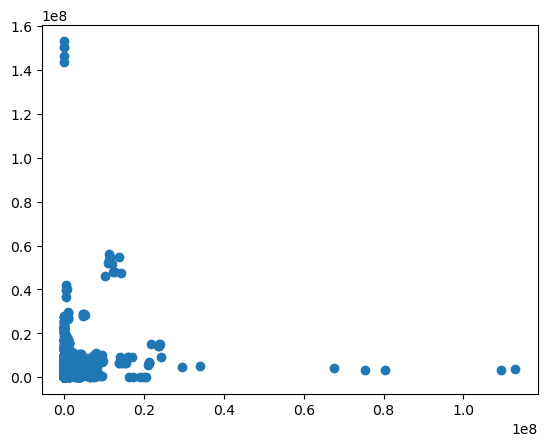

In [80]:
plt.scatter(x=df["DEBT07"], y=df["HOUSES07"]);

Using df_fear to make a scatter plot showing the relationship between HOUSES and DEBT.

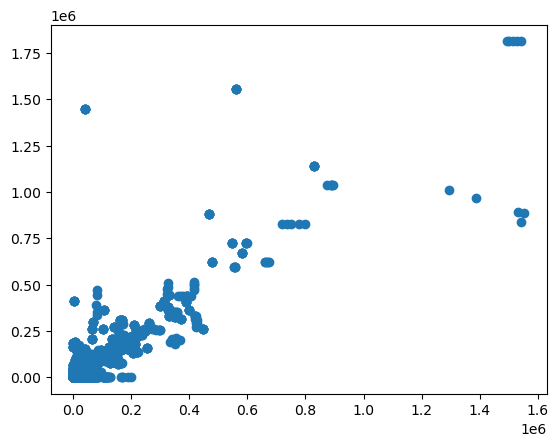

In [81]:
plt.scatter(x=df_fear["DEBT07"], y=df_fear["HOUSES07"]);

The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our df_fear graph shows an almost perfect linear relationship, while the df graph shows something a little more muddled. You might also notice that the datapoints on the df_fear graph form several little groups. Those are called "clusters," and we'll be talking more about how to analyze clustered data in the next prooject.